# Applied Machine Learning :Homework 3
### Name: Priya Kumari

The dataset used in this assignment is the same handwritten alphabet dataset that was used in homework 2. This dataset contains images of alphabets represented by a total of 785 columns. The first column of the dataset represents the alphabet numbering from 0 to 25, which corresponds to the 26 alphabets from A to Z.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")

In [129]:
#load the dataset
data=pd.read_csv("alphabet_handwritten.csv")
data = data.sample(frac=1).reset_index(drop=True) #shuffling and resetting the index
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
data.shape

(79988, 785)

In [130]:
#splitting data into training and testing sets.
#The stratify parameter ensures that the label distribution is maintained between the training and testing set
train,test = train_test_split(data, test_size=0.20, stratify=data['0'])
train.shape,test.shape

((63990, 785), (15998, 785))

In [131]:
#dropping the first column ('0') from the train 
x = train.drop('0', axis=1)
#extracting the label data from the train
y = train['0']

#splitting the training data into a new training set and a validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)

x_test = test.drop('0', axis=1)
y_test = test['0']

In [117]:
# standarizing the dataset before applying PCA
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

### Apply PCA to the training portion of the dataset. How many components do you need to preserve 95% of the variance?

In [132]:
pca_model = PCA()
pca_model.fit(x_train)
cum_sum = np.cumsum(pca_model.explained_variance_ratio_)
dim = np.argmax(cum_sum >= 0.95) + 1

In [64]:
print(dim)

112


Answer:- We need 112 components to preserve 95% of the variance.

### Train a Random Forest classifier on the reduced dataset. Was training much faster than in Homework 2? Evaluate the classifier on the test set. How does it compare to the classifier from Homework 2?

In [113]:
pca_model = PCA(n_components=112)
x_reduced = pca_model.fit_transform(x_train)

In [10]:
# calculating the runtime of Random forest classifier without applying PCA

rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2,random_state=42)

start_time = time.time()
rf.fit(x_train, y_train)
end_time = time.time()

runtime = end_time - start_time
print(f"Runtime of Random Forest without PCA: {runtime:.2f} seconds")

Runtime of Random Forest without PCA: 32.82 seconds


In [11]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2,random_state=42)

start_time = time.time()
model_rf.fit(x_reduced, y_train)
end_time = time.time()

runtime = end_time - start_time
print(f"Runtime of Random Forest: {runtime:.2f} seconds")

Runtime of Random Forest: 65.82 seconds


In [12]:
# calculating accuracy for the reduced dataset
x_reduced_test = pca_model.fit_transform(x_test)

y_pred_test = model_rf.predict(x_reduced_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.663895486935867


Previous result HW2:  It was observed that the Random forest classifier model with n_estimators = 100, max_depth = 20, and min_samples_split = 2 had the best accuracy with value of 0.944 on both the validation and test sets

Answer:-The training time for the random forest on the reduced training dataset was 65.82 seconds, which was twice as slow compared to the original dataset. Therefore, the application of dimensionality reduction did not lead to faster training time. Additionally, the accuracy of the classifier trained on the reduced dataset dropped to 66%, whereas the classifier trained on the original training dataset had a prediction accuracy of 94%. Therefore, it can be concluded that applying PCA not only slowed down the training process but also reduced the performance of the classifier.

### Plot 10 random images in the original form (without PCA) and then plot them after you kept 95% of variance using PCA.

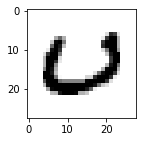

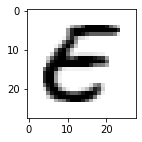

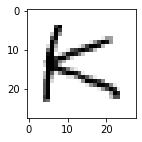

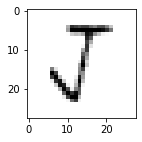

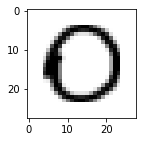

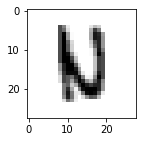

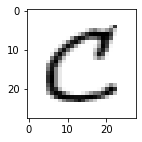

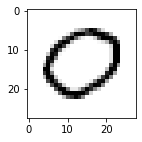

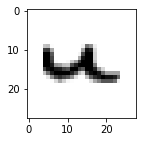

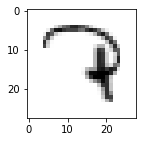

In [114]:
# 10 random images in the original form (without PCA)

for m in range(1,11):
    img_data = []
    k = []
    cnt = 1
    for z in x_train.iloc[m]:
        if(int(cnt)%28 == 0):
            k.append(z)
            img_data.append(k)
            cnt+=1
            k=[]
        else:
            k.append(z)
            cnt+=1
    plt.figure(figsize=(2, 2))
    plt.imshow(img_data, cmap=plt.cm.binary)
    plt.show()

In [115]:
x_recovered = pca_model.inverse_transform(x_reduced)

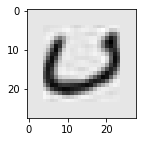

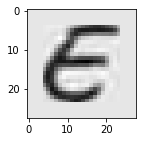

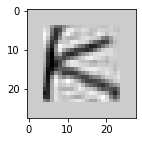

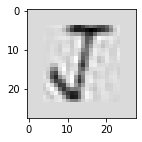

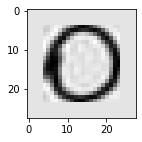

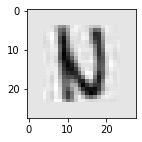

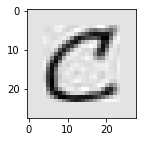

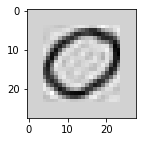

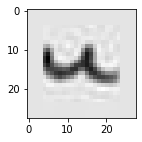

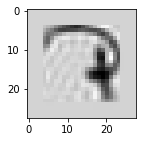

In [116]:
# 10 random images in the reduced form (with PCA)

for m in range(1,11):
    img_data = []
    k = []
    cnt = 1
    for z in x_recovered[m]:
        if(int(cnt)%28 == 0):
            k.append(z)
            img_data.append(k)
            cnt+=1
            k=[]
        else:
            k.append(z)
            cnt+=1
    plt.figure(figsize=(2, 2))
    plt.imshow(img_data, cmap=plt.cm.binary)
    plt.show()

### How much of the variance is explained with the first two principal components?

In [66]:
pca_model = PCA(n_components = 2)
x_2D = pca_model.fit_transform(x_train)

In [67]:
pca_model.explained_variance_ratio_

array([0.12045042, 0.08577677])

Answer:- 12% of the dataset's variance lies along the first principal component and 8% lies along the second principal component. Therefore the first two principal components explain about 20% of the dataset's variance.

### Use PCA to reduce dimensionality to only 2 dimensions. Plot 1000 random images from the training set in the 2D space spanned by the first two principal components. Use a scatterplot with 10 different colors to represent each image’s target class. Repeat the process and create the same type of plots for t-SNE, LLE and MDS. Which of the visualizations do you prefer and why?

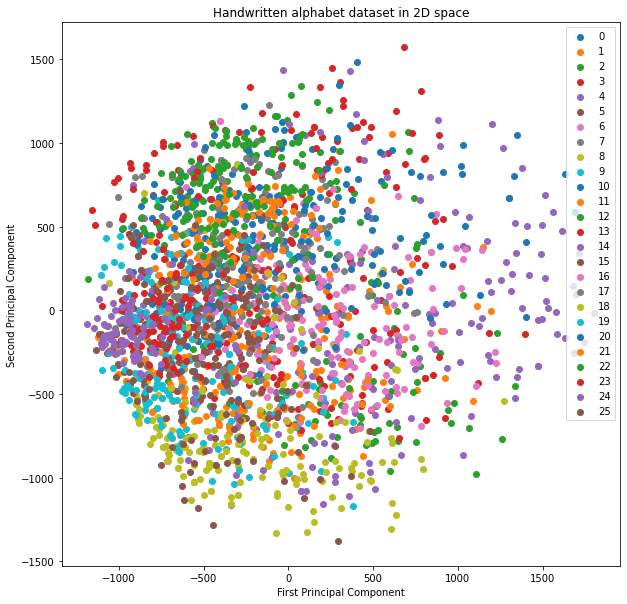

In [99]:
# PCA plot

x_train_reshape = x_train.to_numpy().reshape(-1, 28*28)
pca = PCA(n_components=2, random_state=42)             #selecting 2 components
x_train_reduced = pca.fit_transform(x_train_reshape)
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(26):                                    #for 26 alphabets
    indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(indices, 100)
    ax.scatter(x_train_reduced[random_indices, 0], x_train_reduced[random_indices, 1], label=str(i))
ax.legend()
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Handwritten alphabet dataset in 2D space')
plt.show()

Based on the scatter plot obtained from the PCA analysis, it appears that there are some distinct groupings or clusters of data points. However, it is also evident that there is a significant degree of overlap between these clusters.

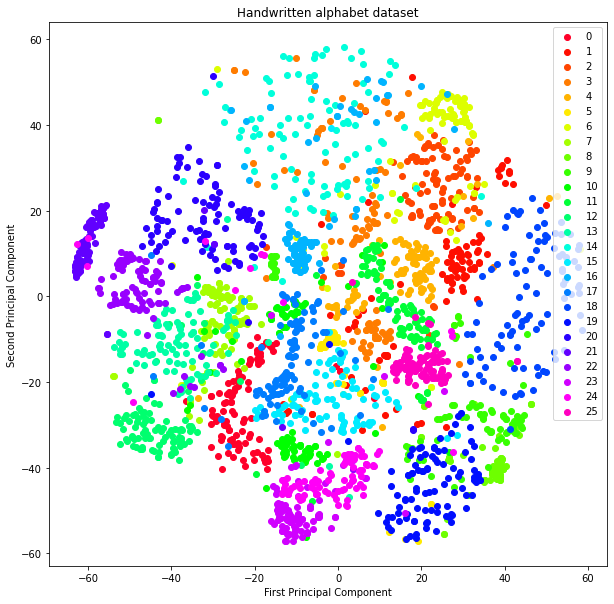

In [19]:
# t-SNE Plot

x_train_reshape = x_train.to_numpy().reshape(-1, 28*28)
tsne = TSNE(n_components=2, random_state=42)
x_train_reduced = tsne.fit_transform(x_train_reshape)
color_map = plt.get_cmap('gist_rainbow', 26)
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(26):                                 # for 26 alphabets
    indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(indices, 100)
    ax.scatter(x_train_reduced[random_indices, 0], x_train_reduced[random_indices, 1],color=color_map(i), label=str(i))
ax.legend()
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Handwritten alphabet dataset')
plt.show()

Based on the t-SNE plot, it can be observed that the majority of the alphabet images are clearly separated from each other and grouped into distinct clusters of similar images. This indicates that the t-SNE algorithm has been successful in capturing the underlying structure of the dataset and visualizing it in a meaningful way.

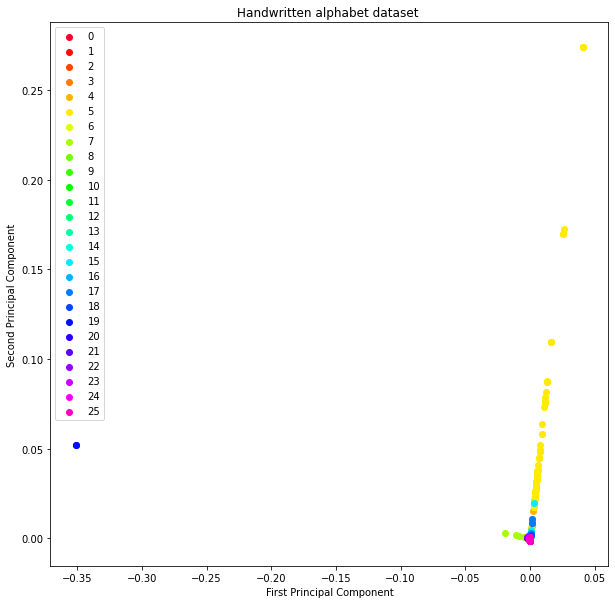

In [93]:
# LLE plot

x_train_reshape = x_train.reshape(-1, 28*28)
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
x_train_reduced = lle.fit_transform(x_train_reshape)
color_map = plt.get_cmap('gist_rainbow', 26)
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(26):
    indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(indices, 100)
    ax.scatter(x_train_reduced[random_indices, 0], x_train_reduced[random_indices, 1],color=color_map(i), label=str(i))
ax.legend()
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Handwritten alphabet dataset ')
plt.show()

The Locally Linear Embedding (LLE)  require more time to run compared to other dimensionality reduction techniques such as Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE). Additionally, the resulting plot is not visually appealing as those produced by PCA and t-SNE.

Text(0.5, 1.0, 'Handwritten alphabet dataset in 2D space')

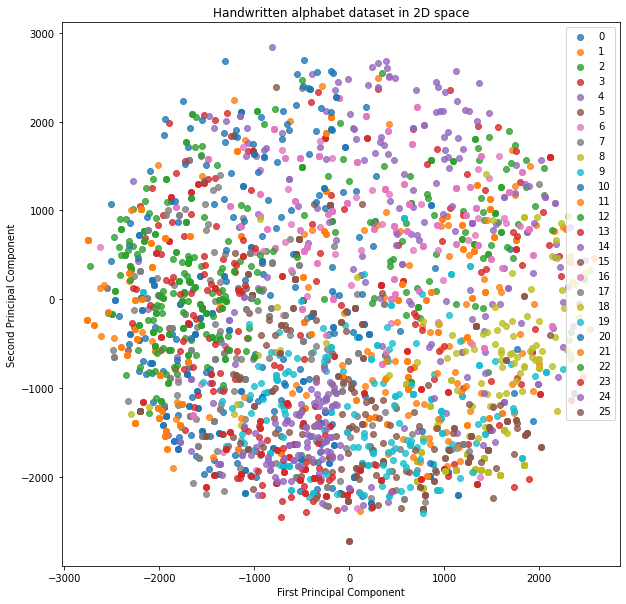

In [127]:
# MDS plot
x_train_reshape = x_train.to_numpy().reshape(-1, 28*28)
indices = np.random.choice(x_train_reshape.shape[0], size=5000, replace=False)
x_train_sampled = x_train_reshape[indices]
y_train_sampled = y_train.iloc[indices]
mds = MDS(n_components=2, random_state=42)
x_train_reduced = mds.fit_transform(x_train_sampled)
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(26):
    indices = np.where(y_train_sampled == i)[0]
    if indices.size == 0:
        continue # skip this iteration if there are no training examples with this label
    random_indices = np.random.choice(indices, 100)
    ax.scatter(x_train_reduced[random_indices, 0], x_train_reduced[random_indices, 1], label=str(i), alpha=0.8)
ax.legend()
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Handwritten alphabet dataset in 2D space')

MDS takes a long time to run, and the resulting plot is not visually appealing or useful due to significant overlap between clusters.

In conclusion, among all the visualization plots generated above for the dataset, t-Distributed Stochastic Neighbor Embedding (t-SNE) produced a better result by separating the data points into various clusters.

### Take 10000 samples of the training portion of fashion MNIST dataset and cluster the images using KMeans. To speed up the algorithm, use PCA to reduce the dimensionality of the dataset. Ensure that you have a good number of clusters using one of the techniques we discussed in class. Visualize the clusters (you can show only a subset of images): do you see similar clothing items in each cluster?

In [69]:

x_train_reshape = x_train.to_numpy().reshape(-1, 28*28)
np.random.seed(42)
indices = np.random.choice(x_train_reshape.shape[0], size=10000, replace=False)
x_train_sampled = x_train_reshape[indices]
pca = PCA(n_components=112, random_state=42)      #taking n_component as 112 
x_train_reduced = pca.fit_transform(x_train_sampled)

num_clusters = [4,6,7,8,9,10,12,13,15,20]
s_score = []
inertia = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_train_reduced)
    s_score.append(silhouette_score(x_train_reduced, kmeans.labels_))
    inertia.append(kmeans.inertia_)

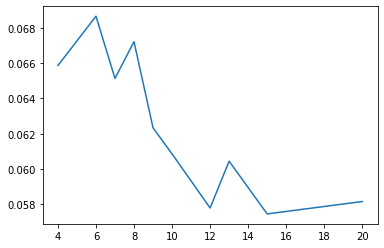

In [70]:
# Silhouette score versus number of clusters
plt.plot(num_clusters, s_score)

There is a peak in the Silhouette score at around cluster 6 , and the score then decreases as the number of clusters increases . This graph suggests that using 6 clusters may be the best choice for this particular data set, as it produces the highest Silhouette score and thus the best separation between clusters. 

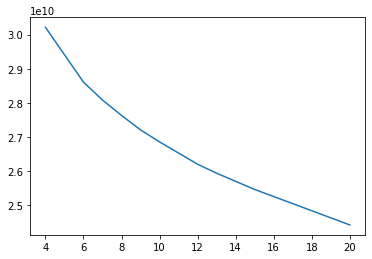

In [125]:
# Inertia versus number of clusters
plt.plot(num_clusters, inertia)

In the graph , there is a clear elbow point at around cluster 6, where the Inertia score starts to level off. This suggests that using 6 cluster may be the optimal choice for this particular data set.

In [72]:
#using cluster 6
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(x_train_reduced)

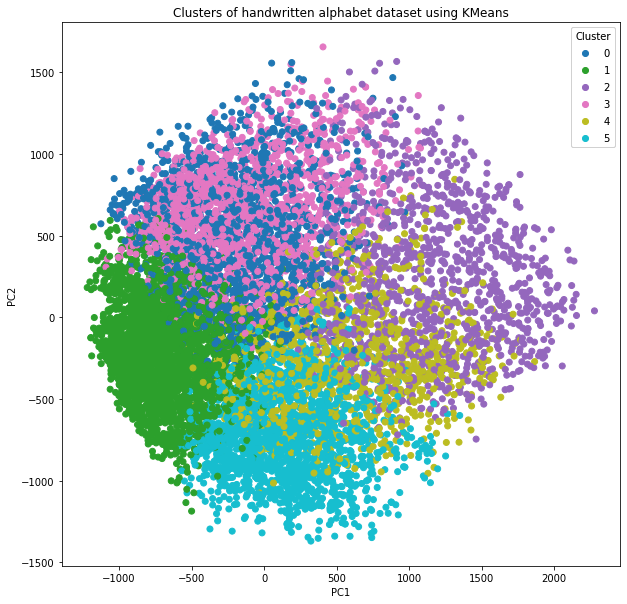

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=labels, cmap='tab10')
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Clusters of handwritten alphabet dataset using KMeans')
plt.show()

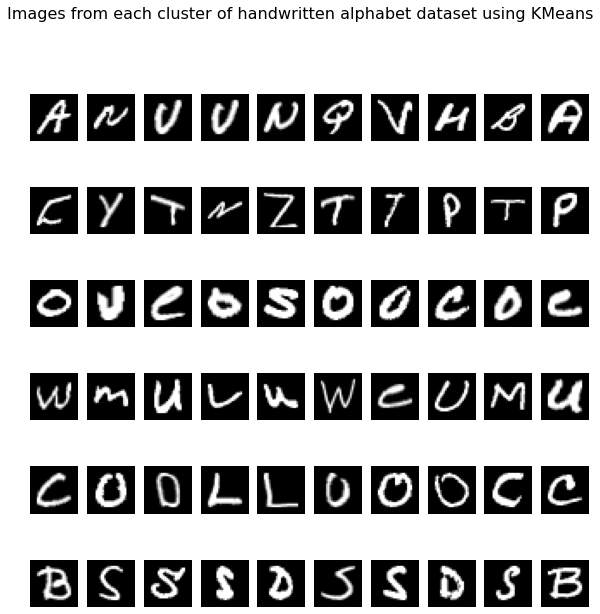

In [74]:

fig, ax = plt.subplots(nrows=6, ncols=10, figsize=(10, 10))
for i in range(6):
    cluster_indices = np.where(labels == i)[0]
    sample_indices = np.random.choice(cluster_indices, size=10, replace=True)
    for j, idx in enumerate(sample_indices):
        ax[i, j].imshow(x_train_sampled[idx].reshape(28, 28), cmap='gray')
        ax[i, j].axis('off')
plt.suptitle('Images from each cluster of handwritten alphabet dataset using KMeans', fontsize=16)
plt.show()

Answer:- Yes similar looking alphabets in each cluster is visible.

### Take 10000 samples of the training portion of fashion MNIST dataset and cluster the images using a Gaussian mixture model. To speed up the algorithm, use PCA to reduce the dimensionality of the dataset. Ensure that you have a good number of clusters using one of the techniques we discussed in the class. Visualize the clusters (you can show only a subset of images): do you see similar clothing items in each cluster? Use the model to generate 20 new clothing items (using the sample() method), and visualize them (since you used PCA, you will need to use its inverse_transform() method).

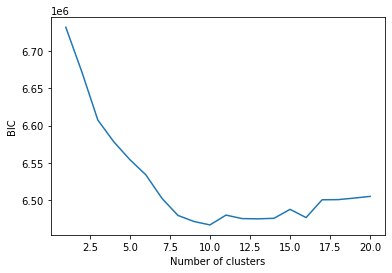

In [133]:

x_train_reshape = x_train.to_numpy().reshape(-1, 28*28)
np.random.seed(42)
sample_idx = np.random.choice(x_train_reshape.shape[0], size=10000, replace=False)
x_sample = x_train_reshape[sample_idx]

x_sample_flat = x_sample.reshape(-1, 784)
pca = PCA(n_components=112)
x_sample_pca = pca.fit_transform(x_sample_flat)

# Use Bayesian information criterion to determine the optimal number of clusters
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x_sample_pca) for n in n_components]
bic = [m.bic(x_sample_pca) for m in models]
plt.plot(n_components, bic)
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

 Based on the BIC plot, it appears that the curve initially shows a decreasing trend, but then it starts to level off or possibly even increase after a certain point, which may indicate the optimal number of clusters for this particular dataset. This point is observed to be at or after 10 clusters.

In [135]:
# Fit a Gaussian mixture model with 10 clusters
n_clusters = 10
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
gmm.fit(x_sample_pca)
x_train = np.array(x_train)
# Use the model to predict cluster assignments for all images in the dataset
x_train_flat = x_train.reshape(-1, 784)
x_train_pca = pca.transform(x_train_flat)
labels = gmm.predict(x_train_pca)

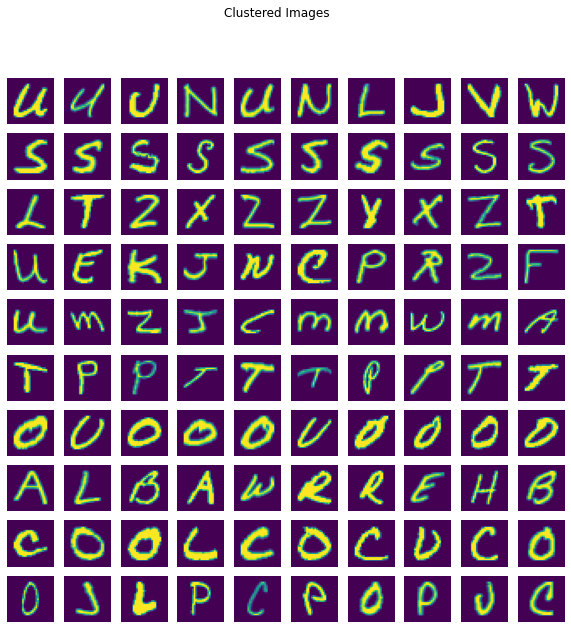

In [136]:

# Visualize a subset of images from each cluster
fig, axs = plt.subplots(n_clusters, 10, figsize=(10, 10))
for i in range(n_clusters):
    idxs = np.where(labels == i)[0]
    for j in range(10):
        axs[i, j].imshow(np.reshape(x_train, (x_train.shape[0], 28, 28))[idxs[j]])
        axs[i, j].axis('off')
plt.suptitle('Clustered Images')
plt.show()


Similar looking alphabets are clustered together

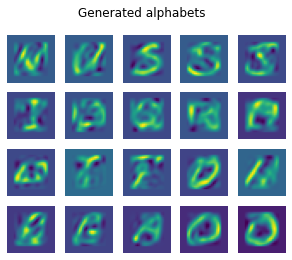

In [137]:
# Generate 20 new alphabets using the GMM and PCA
new_samples_pca = gmm.sample(n_samples=20)[0]
new_samples_flat = pca.inverse_transform(new_samples_pca)
new_samples = new_samples_flat.reshape(-1, 28, 28)
fig, axs = plt.subplots(4, 5, figsize=(5, 4))
for i in range(4):
    for j in range(5):
        axs[i, j].imshow(new_samples[i * 5 + j])
        axs[i, j].axis('off')
plt.suptitle('Generated alphabets')
plt.show()

Answer:- We can see that similar looking alphabets  are mostly grouped together indicating that the GMM and PCA have captured the main features of the dataset.

### Build a fully connected (dense) feedforward neural network with two hidden layers using Keras (within Tensorflow) and train it on 50k Fashion MNIST training images. First hidden layer should contain 200 neurons and second hidden layer should contain 50 neurons. The hidden layers should have ReLU activation function. Train the network for 100 epochs. Plot training and validation loss and accuracy as a function of training epochs. Try three different learning rates of your choice (make the plots for each learning rate). Run the network on the test portion of the dataset using best-performing learning rate and report loss and accuracy. How many parameters does the network have? How many of those parameters are bias parameters?

Epoch 1/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.6230 - accuracy: 0.8243 - val_loss: 0.3420 - val_accuracy: 0.9053
Epoch 2/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9271 - val_loss: 0.2759 - val_accuracy: 0.9186
Epoch 3/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.1829 - accuracy: 0.9480 - val_loss: 0.2049 - val_accuracy: 0.9430
Epoch 4/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.1432 - accuracy: 0.9583 - val_loss: 0.1893 - val_accuracy: 0.9479
Epoch 5/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.1151 - accuracy: 0.9664 - val_loss: 0.1941 - val_accuracy: 0.9457
Epoch 6/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.0967 - accuracy: 0.9710 - val_loss: 0.1756 - val_accuracy: 0.9521
Epoch 7/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.0789 - accuracy: 0.9772 - val_loss: 0.1805 - val_ac

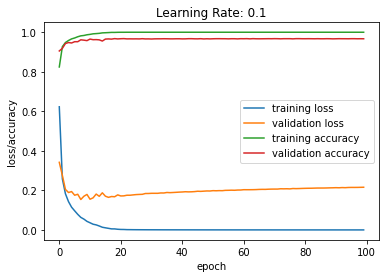

500/500 [==============================] - 1s 1ms/step - loss: 0.2035 - accuracy: 0.9693
Learning Rate: 0.1
Test loss: 0.20347315073013306
Test accuracy: 0.9693086743354797
Total number of parameters: 168376
Number of bias parameters: 276
Epoch 1/100
1440/1440 [==============================] - 2s 1ms/step - loss: 1.5047 - accuracy: 0.6008 - val_loss: 0.8362 - val_accuracy: 0.7955
Epoch 2/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.6748 - accuracy: 0.8187 - val_loss: 0.6109 - val_accuracy: 0.8342
Epoch 3/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.5361 - accuracy: 0.8557 - val_loss: 0.5373 - val_accuracy: 0.8605
Epoch 4/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.4672 - accuracy: 0.8749 - val_loss: 0.4699 - val_accuracy: 0.8748
Epoch 5/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.4182 - accuracy: 0.8891 - val_loss: 0.4343 - val_accuracy: 0.8865
Epoch 6/100
1440/1440 [=============

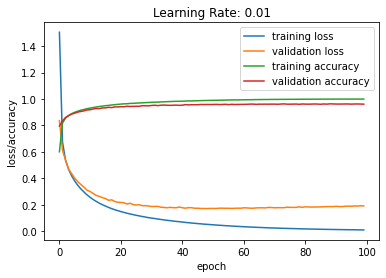

500/500 [==============================] - 1s 1ms/step - loss: 0.1734 - accuracy: 0.9592
Learning Rate: 0.01
Test loss: 0.17338040471076965
Test accuracy: 0.9592449069023132
Total number of parameters: 168376
Number of bias parameters: 276
Epoch 1/100
1440/1440 [==============================] - 2s 1ms/step - loss: 2.6909 - accuracy: 0.2651 - val_loss: 2.3760 - val_accuracy: 0.3633
Epoch 2/100
1440/1440 [==============================] - 2s 1ms/step - loss: 2.1542 - accuracy: 0.4429 - val_loss: 1.9841 - val_accuracy: 0.4855
Epoch 3/100
1440/1440 [==============================] - 2s 1ms/step - loss: 1.8181 - accuracy: 0.5274 - val_loss: 1.6838 - val_accuracy: 0.5555
Epoch 4/100
1440/1440 [==============================] - 2s 1ms/step - loss: 1.5429 - accuracy: 0.5935 - val_loss: 1.4346 - val_accuracy: 0.6199
Epoch 5/100
1440/1440 [==============================] - 2s 1ms/step - loss: 1.3203 - accuracy: 0.6498 - val_loss: 1.2391 - val_accuracy: 0.6732
Epoch 6/100
1440/1440 [============

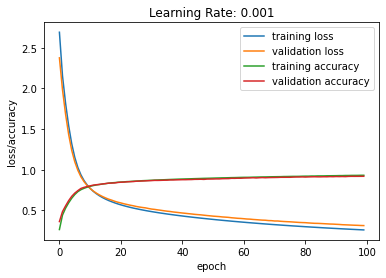

500/500 [==============================] - 1s 1ms/step - loss: 0.2915 - accuracy: 0.9238
Learning Rate: 0.001
Test loss: 0.2915424406528473
Test accuracy: 0.9238029718399048
Total number of parameters: 168376
Number of bias parameters: 276


In [90]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

learning_rates = [0.1, 0.01, 0.001]

for lr in learning_rates:
    # Define the model architecture
    model = keras.Sequential(
        [
            keras.Input(shape=(784)),
            layers.Dense(200, activation="relu"),
            layers.Dense(50, activation="relu"),
            layers.Dense(26),
        ]
    )

    # Compile the model
    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=keras.optimizers.SGD(lr=lr),
        metrics=["accuracy"],
    )

    # Train the model
    history = model.fit(
        x_train,
        y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.1,
    )

    # Plot the training and validation loss and accuracy as a function of training epochs
    plt.plot(history.history["loss"], label="training loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.plot(history.history["accuracy"], label="training accuracy")
    plt.plot(history.history["val_accuracy"], label="validation accuracy")
    plt.xlabel("epoch")
    plt.ylabel("loss/accuracy")
    plt.title(f"Learning Rate: {lr}")
    plt.legend()
    plt.show()

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Learning Rate: {lr}")
    print("Test loss:", test_loss)
    print("Test accuracy:", test_accuracy)

    # Count the total number of parameters and the number of bias parameters in the model
    total_params = model.count_params()
    bias_params = sum([len(layer.get_weights()[1]) for layer in model.layers])
    print("Total number of parameters:", total_params)
    print("Number of bias parameters:", bias_params)

All three models have high test accuracies.However, the second model has the lowest test loss of 0.1734, indicating that it may have better generalization performance.


Conclusion:The best performing model  is the model with learning rate 0.01, which gives an accuracy of 95.9% on test dataset. There are 168376 total parameters and 276 bias parameters.

#### Repeat everything from the previous step but make the hidden layers have linear activation functions. Discuss how this impacts accuracy and why.

Epoch 1/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.7176 - accuracy: 0.8014 - val_loss: 0.6500 - val_accuracy: 0.8225
Epoch 2/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.5866 - accuracy: 0.8406 - val_loss: 0.5922 - val_accuracy: 0.8424
Epoch 3/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.5679 - accuracy: 0.8482 - val_loss: 0.5933 - val_accuracy: 0.8447
Epoch 4/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.5545 - accuracy: 0.8502 - val_loss: 0.6326 - val_accuracy: 0.8311
Epoch 5/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.5478 - accuracy: 0.8510 - val_loss: 0.6092 - val_accuracy: 0.8402
Epoch 6/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.5422 - accuracy: 0.8538 - val_loss: 0.6553 - val_accuracy: 0.8193
Epoch 7/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.5388 - accuracy: 0.8543 - val_loss: 0.6228 - val_ac

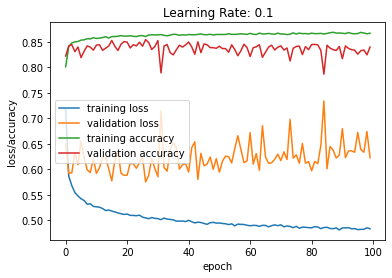

500/500 [==============================] - 1s 1ms/step - loss: 0.6095 - accuracy: 0.8414
Learning Rate: 0.1
Test loss: 0.6094640493392944
Test accuracy: 0.8413551449775696
Total number of parameters: 168376
Number of bias parameters: 276
Epoch 1/100
1440/1440 [==============================] - 2s 1ms/step - loss: 1.0995 - accuracy: 0.7085 - val_loss: 0.7240 - val_accuracy: 0.8133
Epoch 2/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.6388 - accuracy: 0.8273 - val_loss: 0.6192 - val_accuracy: 0.8396
Epoch 3/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.5713 - accuracy: 0.8468 - val_loss: 0.5871 - val_accuracy: 0.8432
Epoch 4/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.5414 - accuracy: 0.8563 - val_loss: 0.5674 - val_accuracy: 0.8502
Epoch 5/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.5236 - accuracy: 0.8618 - val_loss: 0.5554 - val_accuracy: 0.8590
Epoch 6/100
1440/1440 [==============

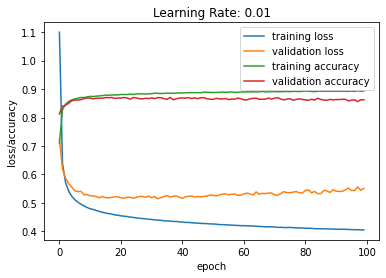

500/500 [==============================] - 1s 1ms/step - loss: 0.5193 - accuracy: 0.8663
Learning Rate: 0.01
Test loss: 0.5193240642547607
Test accuracy: 0.8662958145141602
Total number of parameters: 168376
Number of bias parameters: 276
Epoch 1/100
1440/1440 [==============================] - 2s 1ms/step - loss: 2.2453 - accuracy: 0.4085 - val_loss: 1.7844 - val_accuracy: 0.5510
Epoch 2/100
1440/1440 [==============================] - 2s 1ms/step - loss: 1.5459 - accuracy: 0.6015 - val_loss: 1.3696 - val_accuracy: 0.6475
Epoch 3/100
1440/1440 [==============================] - 2s 1ms/step - loss: 1.2407 - accuracy: 0.6706 - val_loss: 1.1410 - val_accuracy: 0.7066
Epoch 4/100
1440/1440 [==============================] - 2s 1ms/step - loss: 1.0613 - accuracy: 0.7175 - val_loss: 1.0005 - val_accuracy: 0.7451
Epoch 5/100
1440/1440 [==============================] - 2s 1ms/step - loss: 0.9455 - accuracy: 0.7491 - val_loss: 0.9079 - val_accuracy: 0.7660
Epoch 6/100
1440/1440 [=============

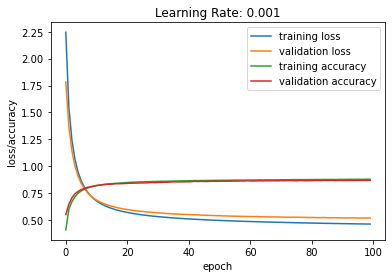

500/500 [==============================] - 1s 1ms/step - loss: 0.5001 - accuracy: 0.8714
Learning Rate: 0.001
Test loss: 0.500124454498291
Test accuracy: 0.8714214563369751
Total number of parameters: 168376
Number of bias parameters: 276


In [91]:
learning_rates = [0.1, 0.01, 0.001]

for lr in learning_rates:
    # Define the model architecture
    model = keras.Sequential(
        [
            keras.Input(shape=(784)),
            layers.Dense(200, activation="linear"),
            layers.Dense(50, activation="linear"),
            layers.Dense(26),
        ]
    )

    # Compile the model
    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=keras.optimizers.SGD(lr=lr),
        metrics=["accuracy"],
    )

    # Train the model
    history = model.fit(
        x_train,
        y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.1,
    )

    # Plot the training and validation loss and accuracy as a function of training epochs
    plt.plot(history.history["loss"], label="training loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.plot(history.history["accuracy"], label="training accuracy")
    plt.plot(history.history["val_accuracy"], label="validation accuracy")
    plt.xlabel("epoch")
    plt.ylabel("loss/accuracy")
    plt.title(f"Learning Rate: {lr}")
    plt.legend()
    plt.show()

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Learning Rate: {lr}")
    print("Test loss:", test_loss)
    print("Test accuracy:", test_accuracy)

    # Count the total number of parameters and the number of bias parameters in the model
    total_params = model.count_params()
    bias_params = sum([len(layer.get_weights()[1]) for layer in model.layers])
    print("Total number of parameters:", total_params)
    print("Number of bias parameters:", bias_params)

Answer:- We achieve a maximum test accuracy of 87.1% using linear activation function, which is worse than ReLU activation function. The reason for this decrease in accuracy is that linear activation functions can lead to vanishing or exploding gradients during training. This makes it more difficult for the network to learn meaningful representations of the data, which in turn leads to lower accuracy. ReLU activation functions, on the other hand, are known to be more effective at avoiding the vanishing gradient problem, which makes them a better choice for most deep learning tasks. 